# Actual Analysis

Quando observamos

In [1]:
# Load the packages

import numpy as np
import pandas as pd
import scanpy as sc

# Load data and global variables

preprocessed_file = 'preprocessing/pbmc3k.h5ad'
results_file = 'analysis/pbmc3k.h5ad'

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read(preprocessed_file)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


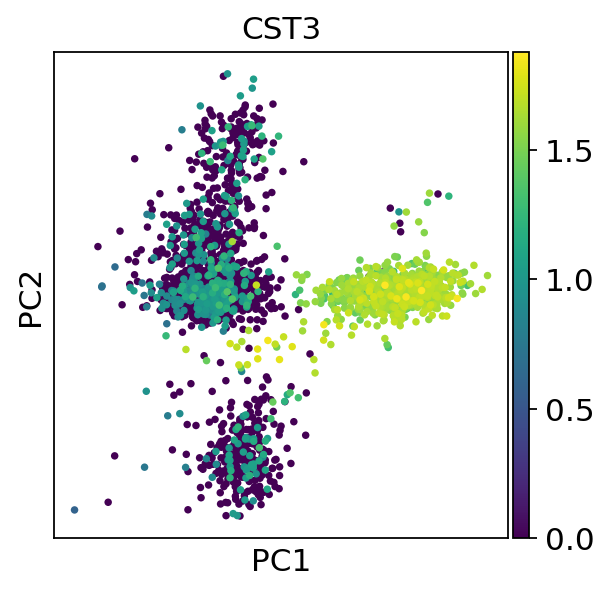

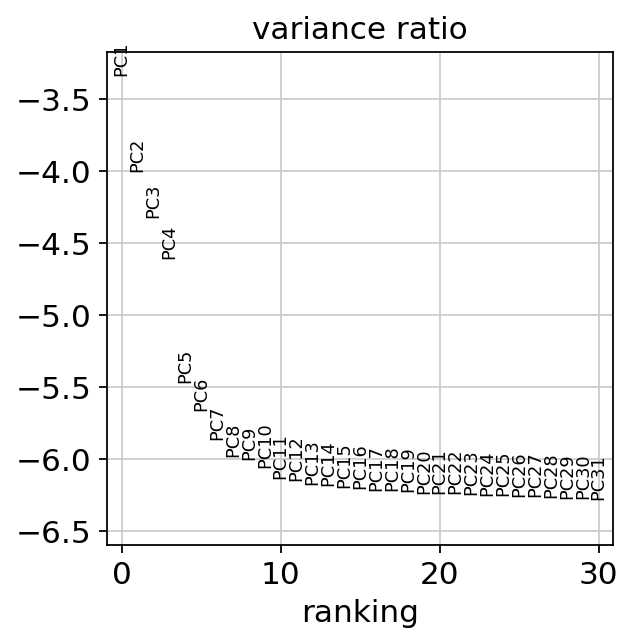

In [2]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)

In [3]:
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


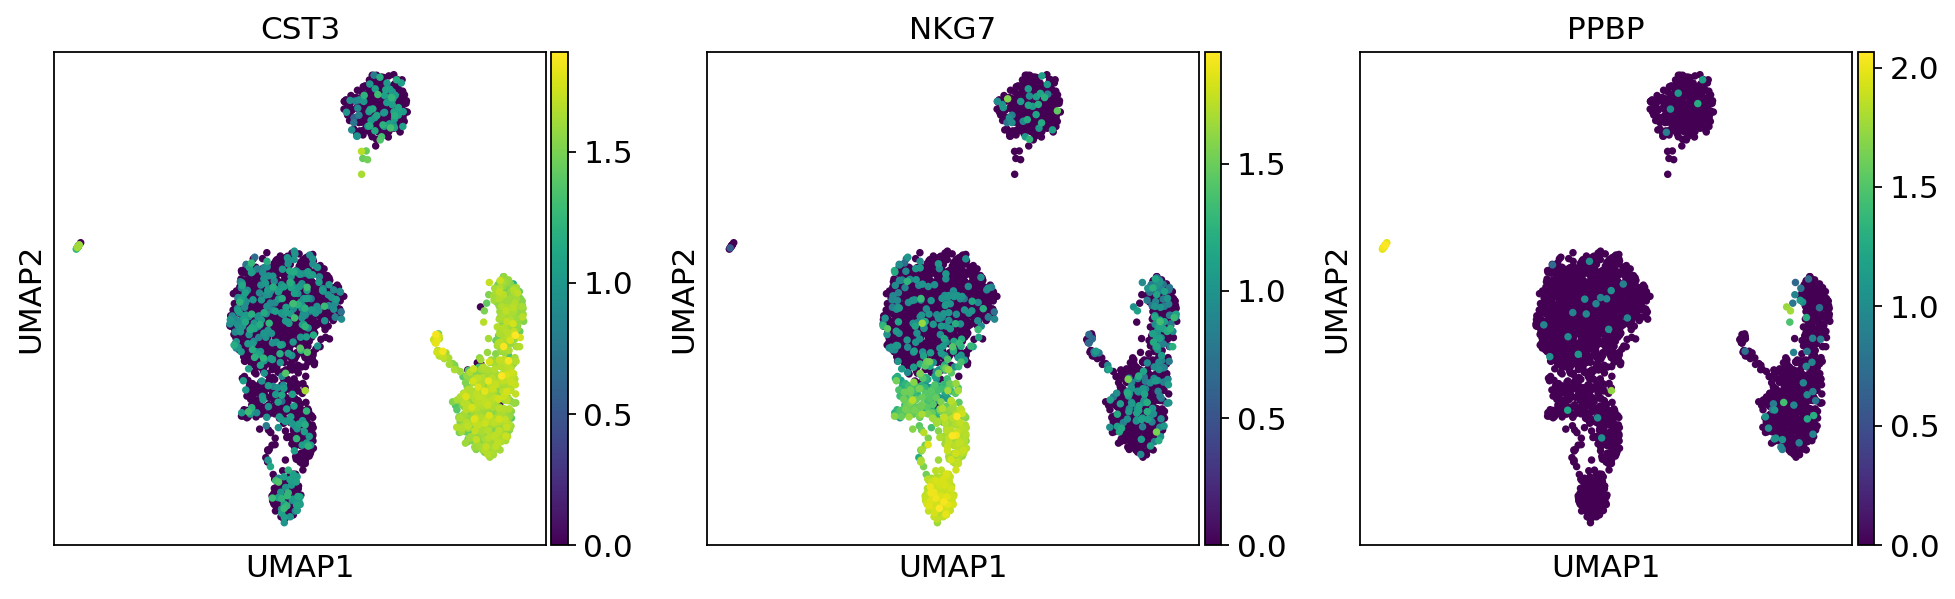

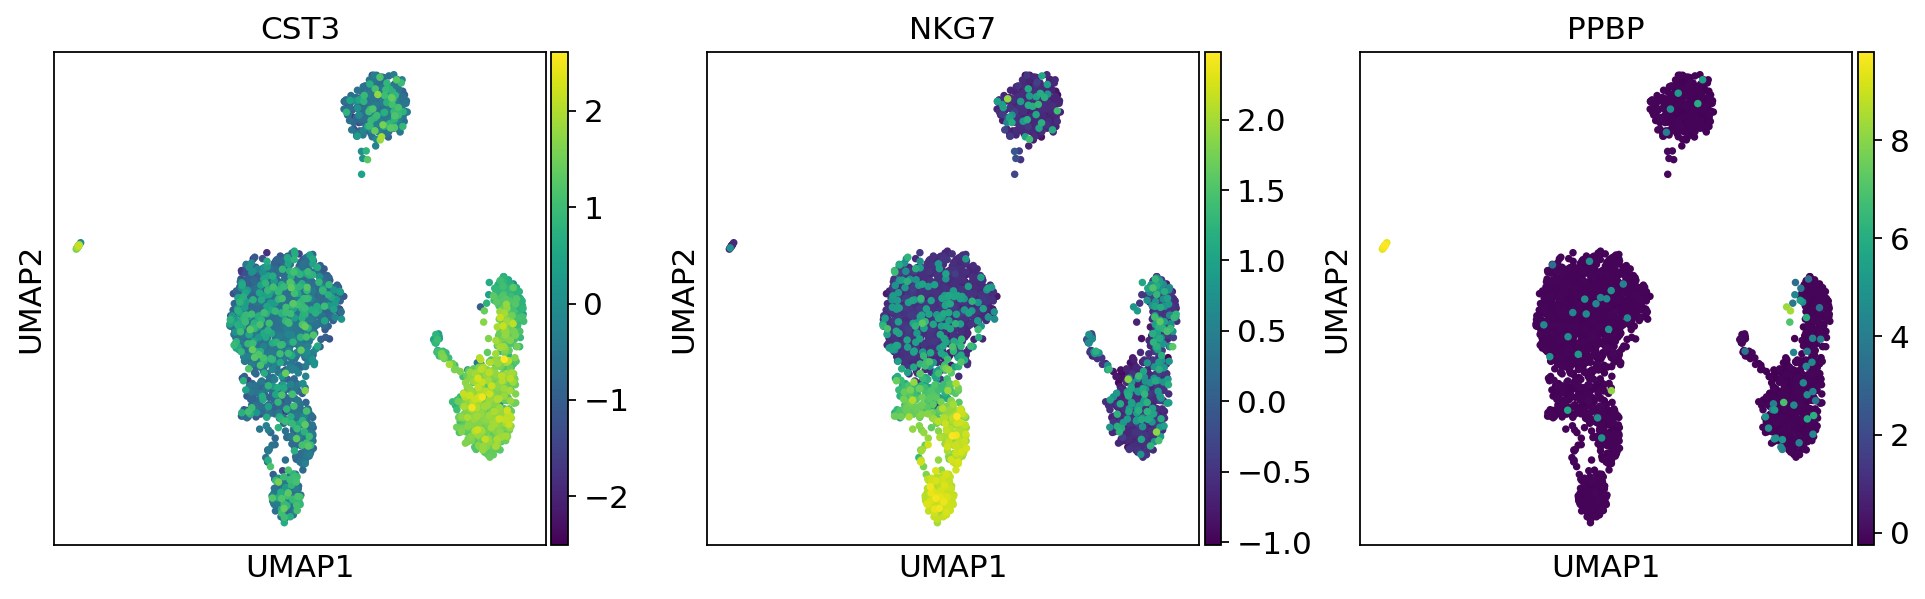

In [4]:
# Embedding the neighborhood graph

# sc.tl.paga(adata)
# sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')

sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


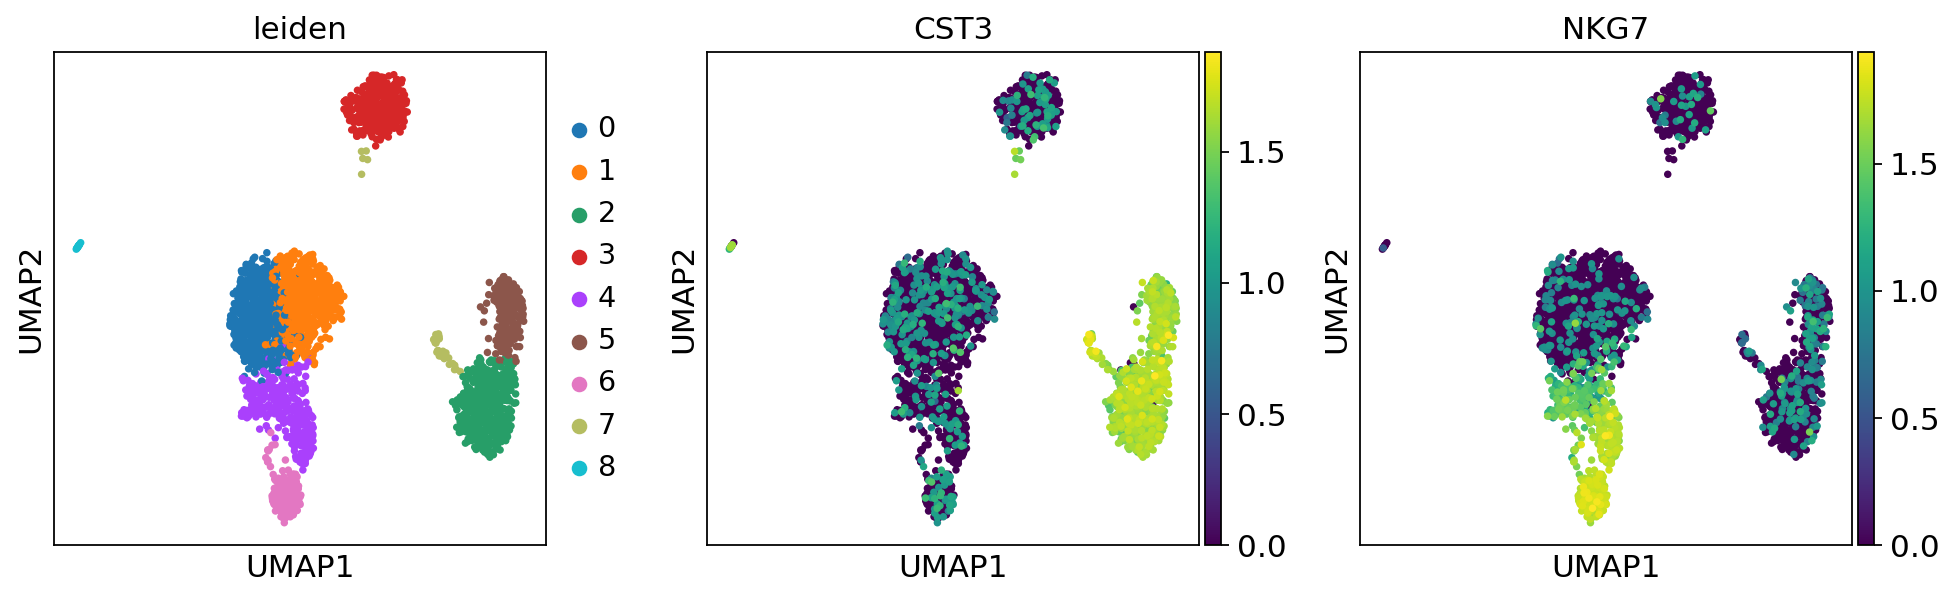

In [5]:
# Clustering the neighborhood graph

sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


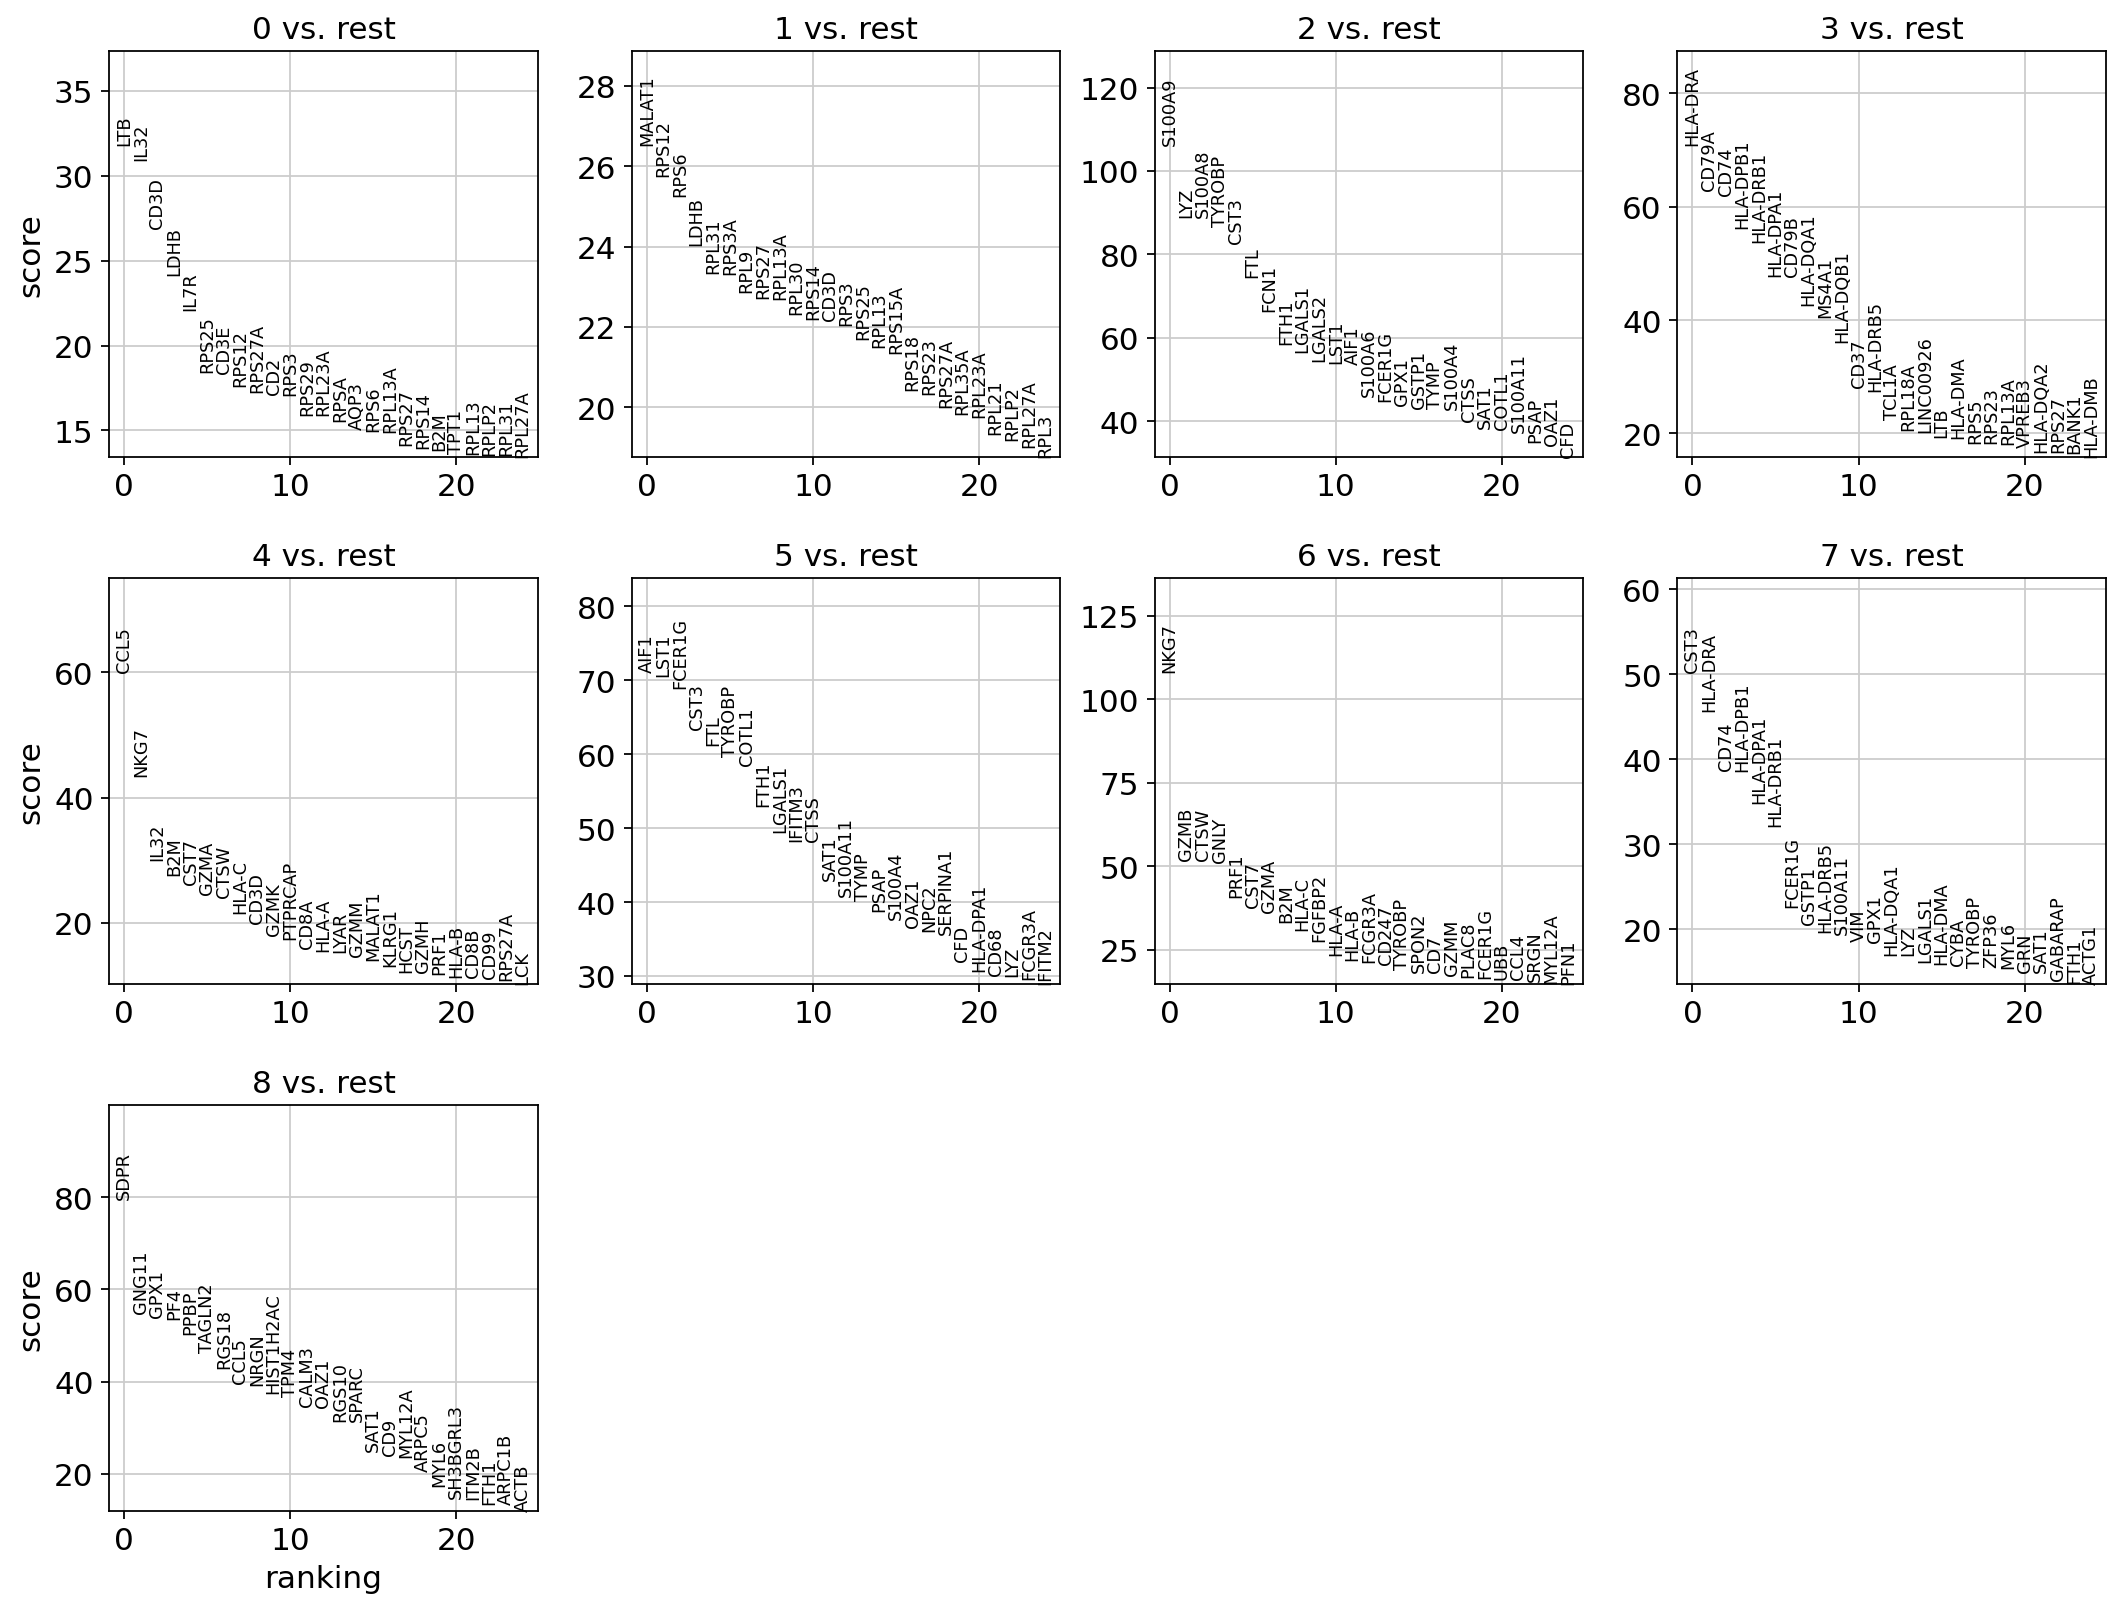

ranking genes
    finished (0:00:01)


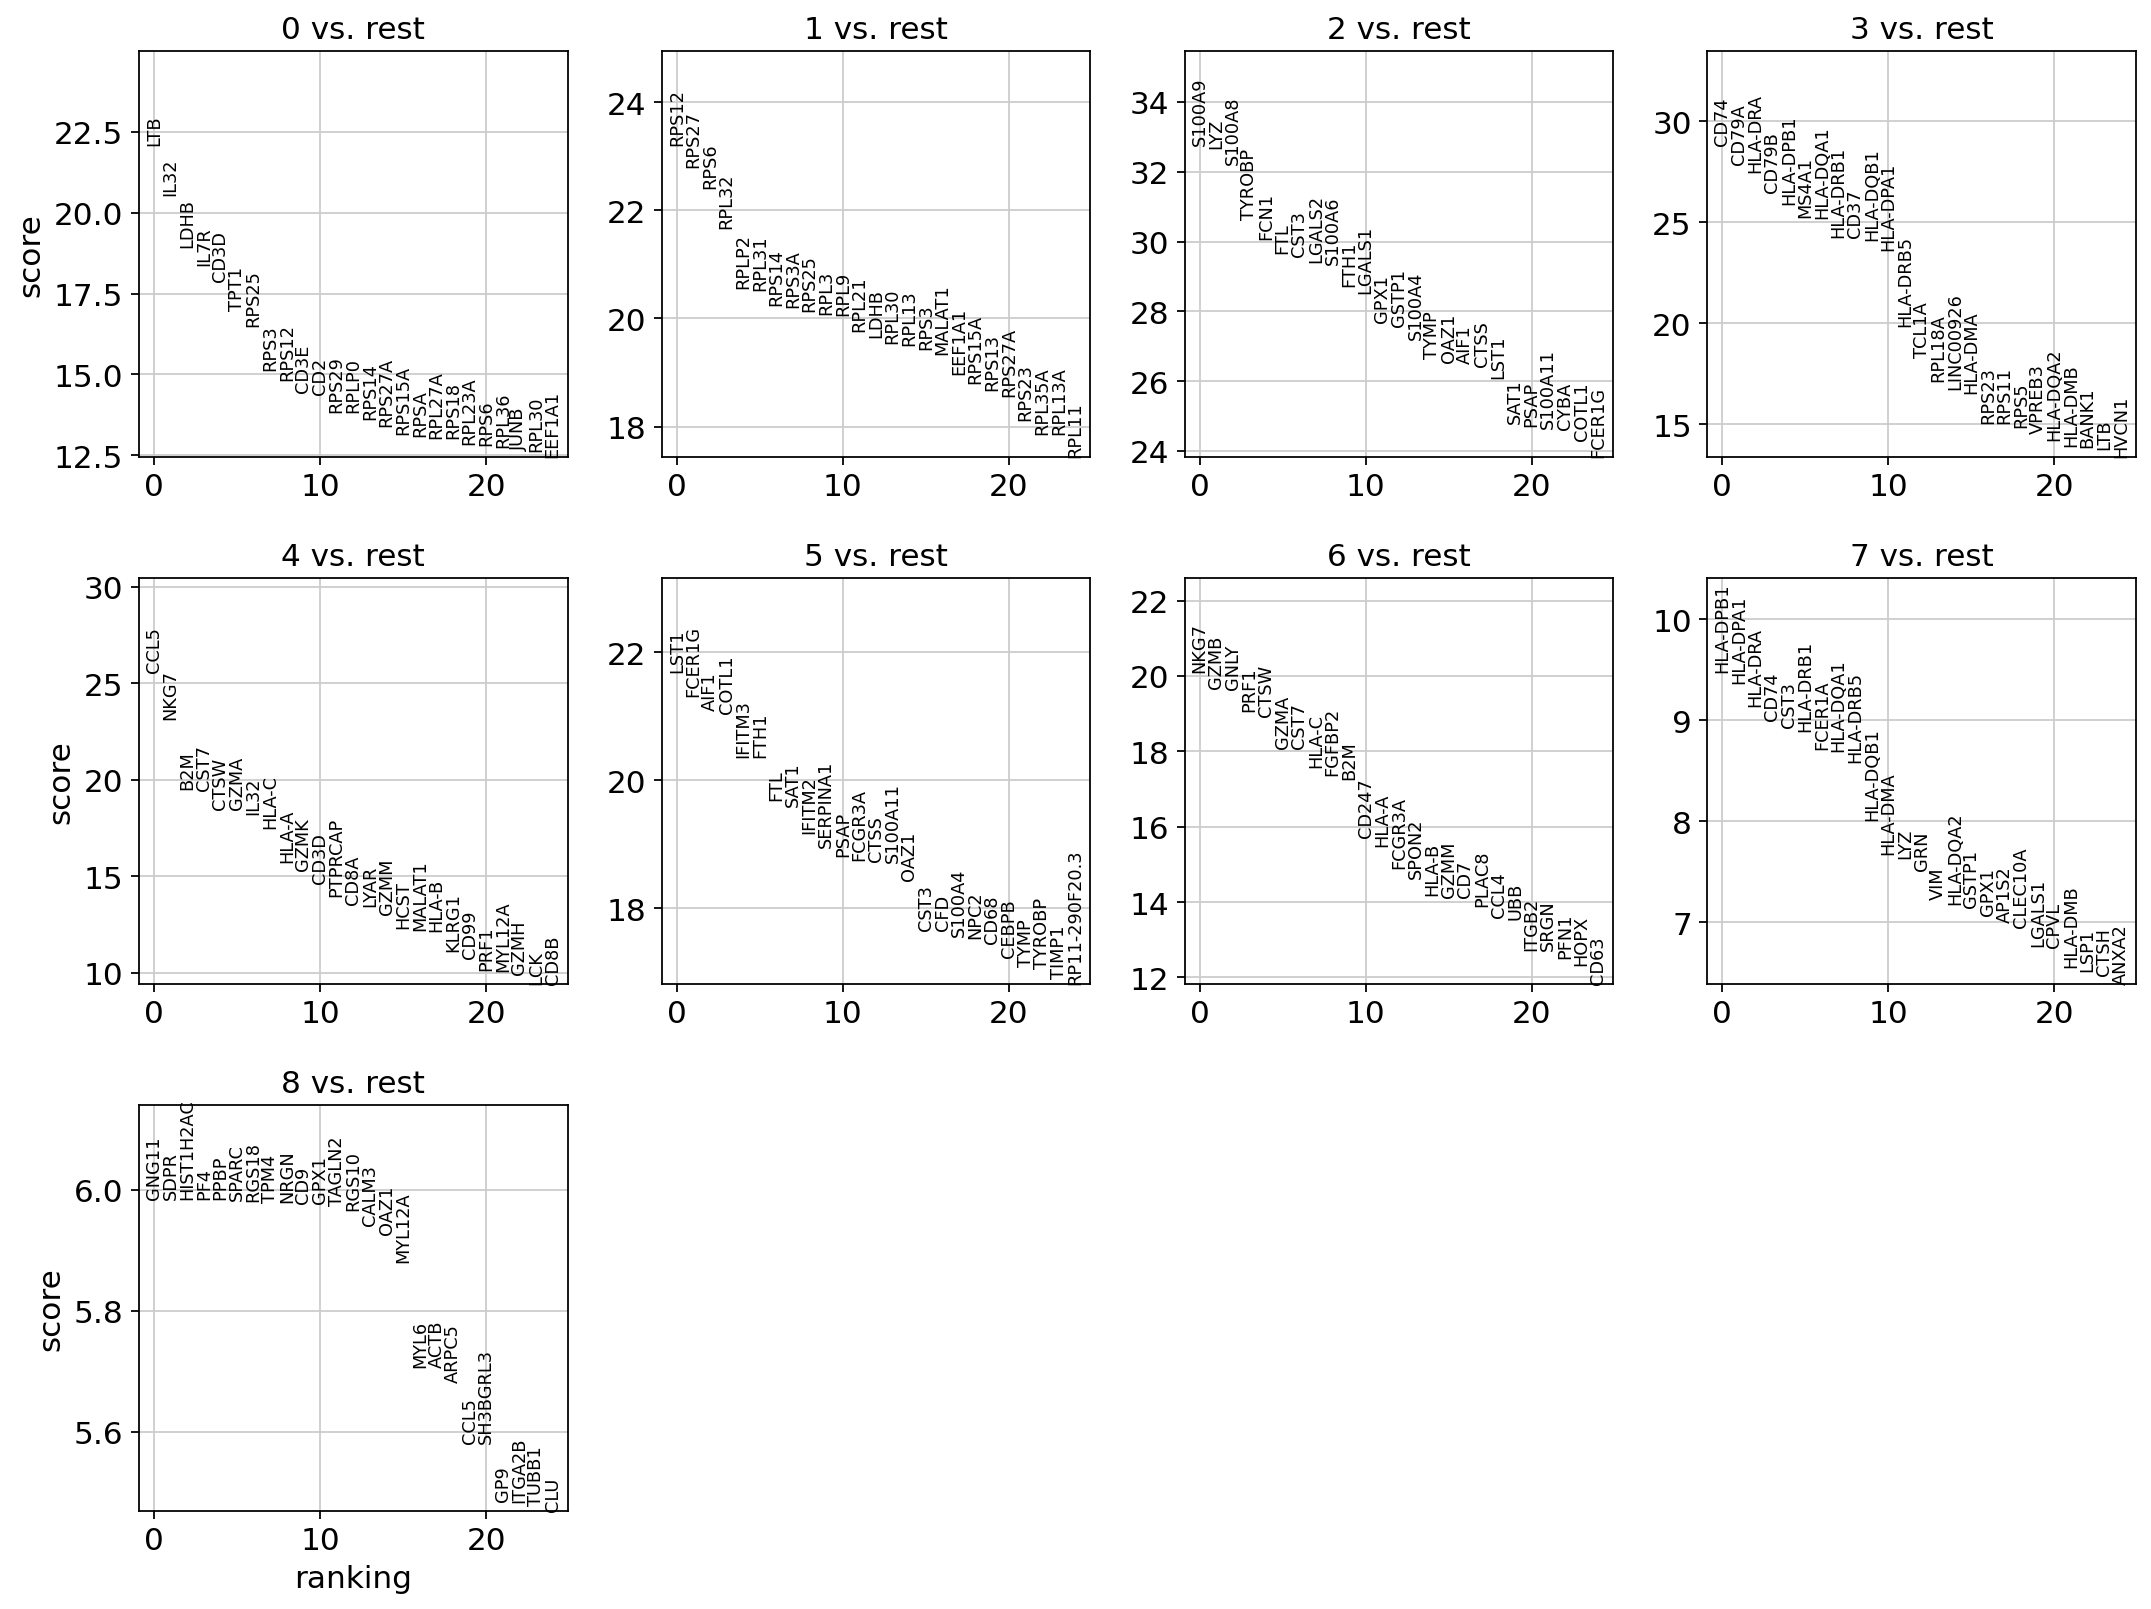

ranking genes
    finished (0:00:11)


/home/dm/miniconda3/envs/pbmc_scrna/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


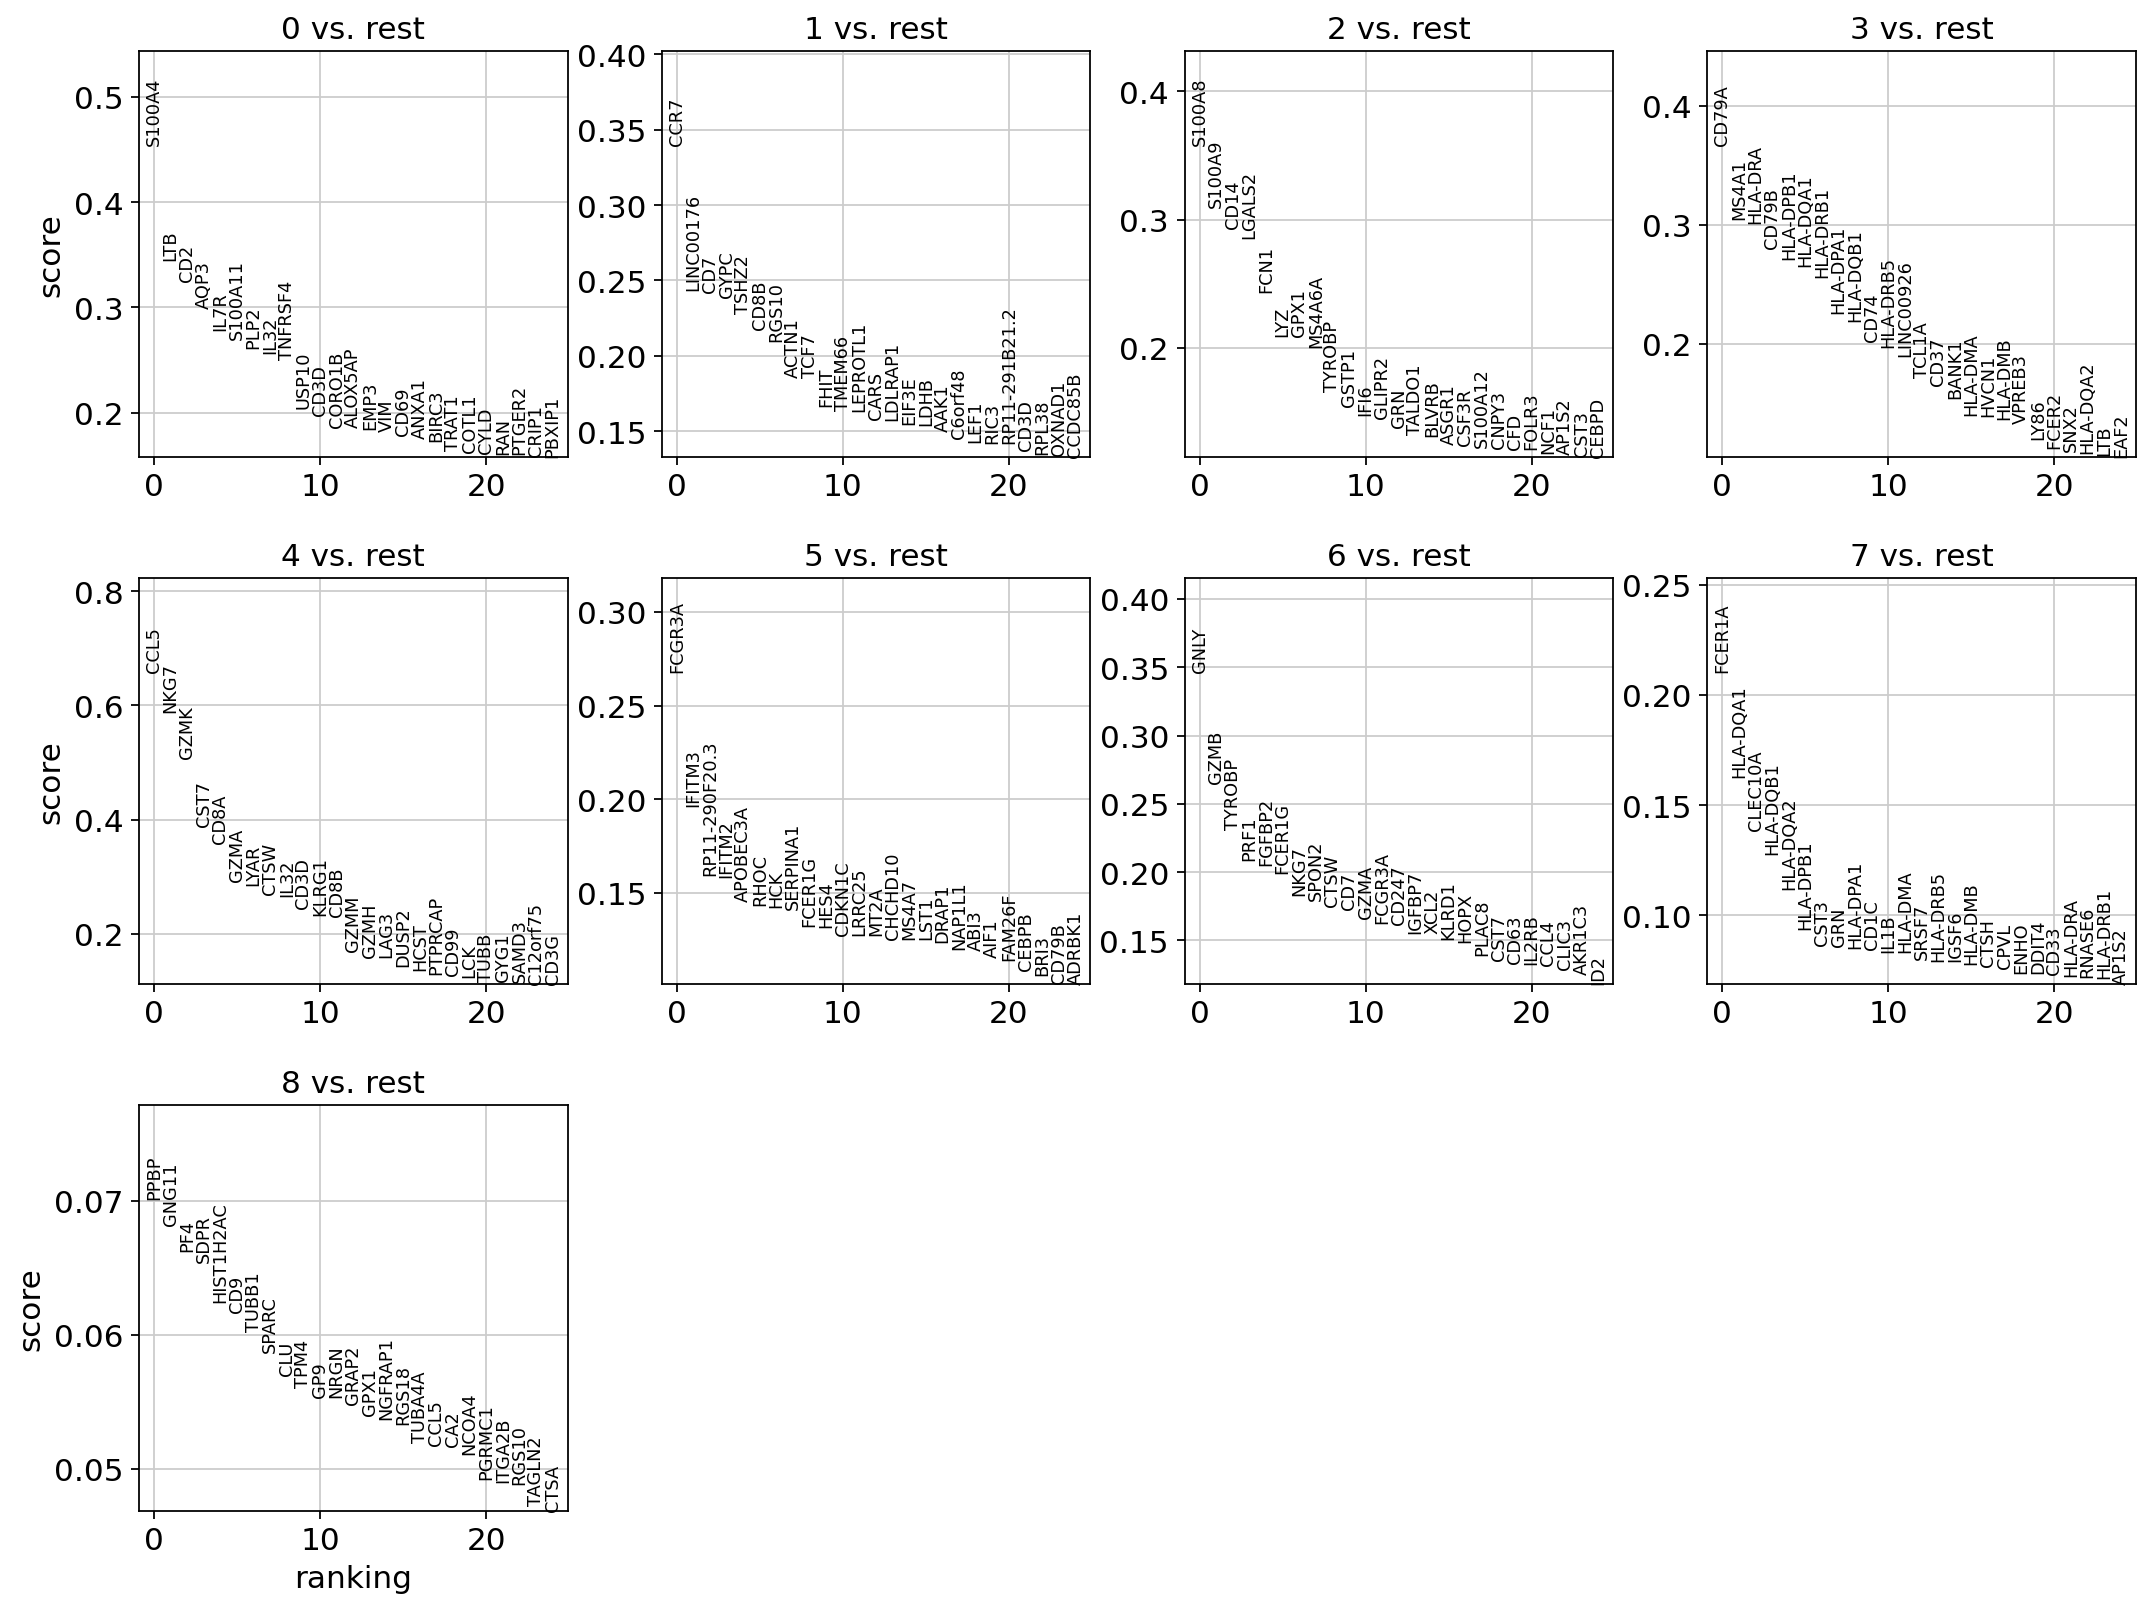

In [6]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.pl.dotplot(adata, marker_genes_dict, 'cell type', dendrogram=True)

## Differential Expression

In [7]:
import diffxpy.api as de

# single coef
filter = adata.obs["leiden"] == 0
# sub_set = adata[]
#
# test = de.test.wald(
#     data=adata,
#     formula_loc="~ 1 + leiden",
#     factor_loc_totest="leiden"
# )
#
# test.summary().iloc[:10,:]
#
# # multiple coef
#
# test = de.test.wald(
#     data=adata,
#     formula_loc="~ 1 + leiden",
#     factor_loc_totest="leiden"
# )
#
# test.summary().iloc[:10,:]

In [8]:
adata.write(results_file)

## RNA velocity